# Level 1

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import folium
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import string
import nltk


In [70]:
data=pd.read_csv(r"C:\Users\USER\Downloads\Dataset  (1).csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [71]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [46]:
df = pd.get_dummies(data)
df.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Review Length,Restaurant Name_#45,...,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,9,False,...,False,False,False,False,False,True,False,False,False,False
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,9,False,...,False,False,False,False,False,True,False,False,False,False
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,9,False,...,False,False,False,False,False,False,False,False,False,True
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,9,False,...,False,False,False,False,False,True,False,False,False,False
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,9,False,...,False,False,False,False,False,True,False,False,False,False


## Level 1
Task 1

In [4]:
top_cuisines = data[ 'Cuisines'].value_counts().head(3)
print("Top Three Most Common Cuisines")
print(top_cuisines)

Top Three Most Common Cuisines
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [19]:
top_cuisines = data['Cuisines'].value_counts().head(3)

total_restaurants = len(data)

print("Percentage of Restaurants Serving Each of the Top Cuisines:")
for cuisine, count in top_cuisines.items():
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}%")

Percentage of Restaurants Serving Each of the Top Cuisines:
North Indian: 9.80%
North Indian, Chinese: 5.35%
Chinese: 3.71%


## task 2

In [6]:
city_counts = data['City'].value_counts()

city_with_most_restaurants = city_counts.idxmax()
max_restaurants_count = city_counts.max()

print(f"The city with the highest number of restaurants is {city_with_most_restaurants} with {max_restaurants_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


In [7]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [21]:
data=data.replace({
    'Rating text':{'Excellent':5, 'Very Good':4, 'Good':3, 'Average':2, 'Not rated':0, 'Poor':1} 
})

In [27]:
average_rating_by_city = data.groupby('City')['Aggregate rating'].mean()
max = average_rating_by_city.idxmax()
print("Average Rating for Restaurants in Each City:")
print(average_rating_by_city)
print("\nCity with maximum averae restaurant rating is :")
print(max)

Average Rating for Restaurants in Each City:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with maximum averae restaurant rating is :
Inner City


### Task 3

In [10]:
count_result = data[ 'Price range'].value_counts()
count_result


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

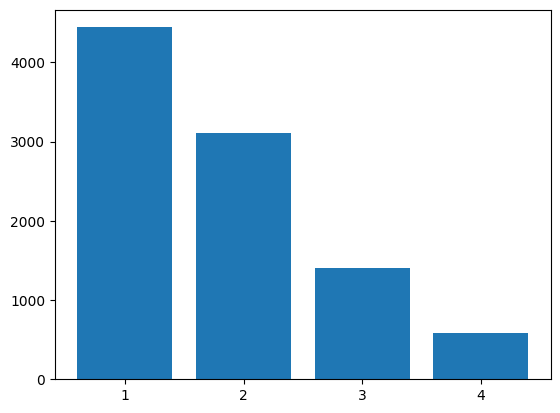

In [29]:
lab=["1","2","3","4"]
plt.bar(lab,height=count_result)

plt.show()

In [30]:
price_range_counts = data['Price range'].value_counts()
total_restaurants = len(data)
percentage_per_category = (price_range_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range category:")
print(percentage_per_category)

Percentage of restaurants in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [33]:
top_cuisines = data['Price range'].value_counts().head(3)
total_restaurants = len(data)
print("Percentage of Restaurants Serving Each of the Top Cuisines:")
for cuisine, count in top_cuisines.items():
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}%")

Percentage of Restaurants Serving Each of the Top Cuisines:
1: 46.53%
2: 32.59%
3: 14.74%


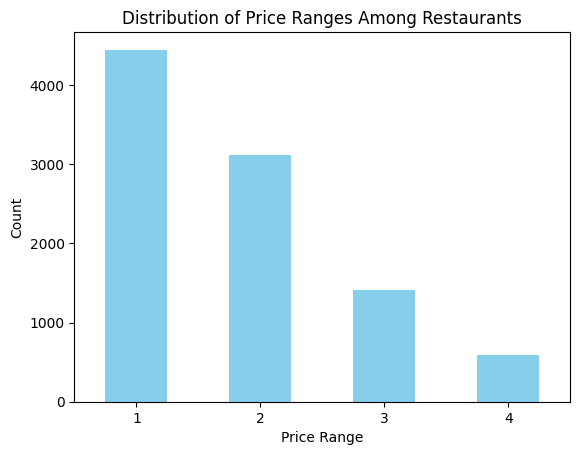

In [62]:
price_range_counts = data['Price range'].value_counts()
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()  # Ensure

### Task 4

In [38]:
top_cuisines = data['Has Online delivery'].value_counts().head(3)

total_restaurants = len(data)

print("Percentage of Restaurants Serving Each of the Top Cuisines:")
for cuisine, count in top_cuisines.items():
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}%")

Percentage of Restaurants Serving Each of the Top Cuisines:
No: 74.34%
Yes: 25.66%


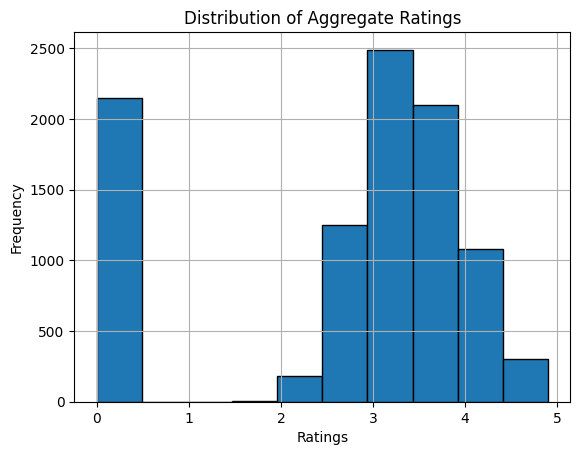

The most common rating is: 0.0


In [7]:
plt.hist(data['Aggregate rating'], bins=10, edgecolor='black')  
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.grid(True)
plt.show()


rating_counts =data ['Aggregate rating'].value_counts()
most_common_rating = rating_counts.idxmax()
print("The most common rating is:", most_common_rating)

In [8]:
average_votes = data['Votes'].mean()

print("The average number of votes received by restaurants is:", average_votes)

The average number of votes received by restaurants is: 156.909747670401


In [13]:
data['cuisines_str'] = data['Cuisines'].apply(lambda x: ', '.join(sorted(x)) if isinstance(x, list) else '')
cuisine_counts = data['cuisines_str'].value_counts()

top_combinations = cuisine_counts.head(5)
print("Top 5 most common combinations of cuisines:")
print(top_combinations)

Top 5 most common combinations of cuisines:
cuisines_str
    9551
Name: count, dtype: int64


In [17]:
average_ratings = data.groupby('cuisines_str')['Aggregate rating'].mean()

# Display the average ratings for each combination of cuisines
print("Average ratings for each combination of cuisines:")
print(average_ratings)

Average ratings for each combination of cuisines:
cuisines_str
    2.66637
Name: Aggregate rating, dtype: float64


# task 3

In [74]:
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)
folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(mymap)
mymap.save("restaurants_map.html")

In [75]:
from IPython.display import IFrame

IFrame(src="restaurants_map.html", width=800, height=600)


In [30]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data[['Latitude', 'Longitude']])
data['Cluster'] = kmeans.labels_
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)
colors = ['red', 'blue', 'green']
for i, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row[ 'Restaurant Name'], 
                  icon=folium.Icon(color=colors[row['Cluster']])).add_to(mymap)

mymap.save("clustered_restaurants_map.html")

In [76]:
from IPython.display import IFrame

IFrame(src="clustered_restaurants_map.html", width=800, height=600)

# task 4

In [6]:
restaurant_counts = data['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]

if len(restaurant_chains) > 0:
    print("Restaurant chains present in the dataset:")
    print(restaurant_chains)
else:
    print("No restaurant chains found in the dataset.")

Restaurant chains present in the dataset:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


In [25]:
restaurant_chains = data['Restaurant Name'].unique()
chain_aggregates = []
for chain in restaurant_chains:
    chain_data = data[data[ 'Restaurant Name'] == chain]

    chain_votes_sum = chain_data['Votes'].sum()
    chain_aggregates.append({'Chain': chain, 'Avg Rating': chain_ratings_mean, 'Total Votes': chain_votes_sum})

chain_aggregates_df = pd.DataFrame(chain_aggregates)
chain_aggregates_df = chain_aggregates_df.sort_values(by='Avg Rating', ascending=False)
print("Analysis of ratings and popularity of different restaurant chains:")
print(chain_aggregates_df)

Analysis of ratings and popularity of different restaurant chains:
                         Chain  Avg Rating  Total Votes
0             Le Petit Souffle         4.0          314
4960   Dinesh Ka Mithila Dhaba         4.0            0
4972                  Momozone         4.0            0
4971        KGN Chicken Corner         4.0            1
4970   Kayasthas Food Junction         4.0            1
...                        ...         ...          ...
2477          Super Restaurant         4.0            5
2476           Soni Bhojnalaya         4.0            4
2475            Sindhi Chicken         4.0            7
2474         Shri Hari Sharnam         4.0           14
7445  Walter's Coffee Roastery         4.0          591

[7446 rows x 3 columns]


# Level 3
Task 1

In [33]:
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text into words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return filtered_tokens
positive_keywords = Counter()
negative_keywords = Counter()

for index, row in data.iterrows():
    tokens = preprocess_text(row['Rating text'])
    sentiment_score = sid.polarity_scores(row['Rating text'])['compound']
    if sentiment_score >= 0.1:
        positive_keywords.update(tokens)
    elif sentiment_score <= -0.1:
        negative_keywords.update(tokens)
print("Most common positive keywords:")
print(positive_keywords.most_common(5))

print("\nMost common negative keywords:")
print(negative_keywords.most_common(5))

Most common positive keywords:
[('good', 3179), ('excellent', 301)]

Most common negative keywords:
[('poor', 186)]


Average review length: 7.02 characters

Average review length by rating:
Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: Review Length, dtype: float64


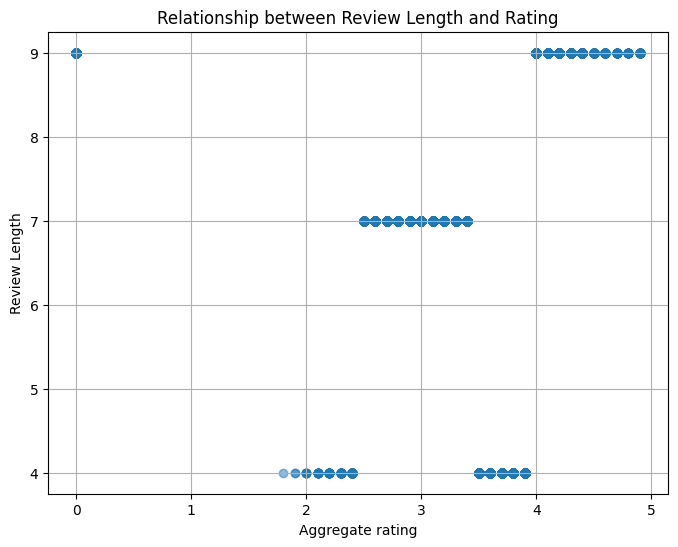

In [34]:
data['Review Length'] = data['Rating text'].apply(len)
average_review_length = data['Review Length'].mean()
print(f"Average review length: {average_review_length:.2f} characters")
average_length_by_rating = data.groupby('Aggregate rating')['Review Length'].mean()
print("\nAverage review length by rating:")
print(average_length_by_rating)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Aggregate rating'], data['Review Length'], alpha=0.5)
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Review Length')
plt.grid(True)
plt.show()

## task 2

In [37]:
restaurant_highest_votes = data.loc[data['Votes'].idxmax()]

# Identify the restaurant with the lowest number of votes
restaurant_lowest_votes = data.loc[data['Votes'].idxmin()]

print("Restaurant with the highest number of votes:")
print(restaurant_highest_votes)

print("\nRestaurant with the lowest number of votes:")
print(restaurant_lowest_votes)

Restaurant with the highest number of votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

In [39]:
correlation_coefficient = data['Votes'].corr(data['Aggregate rating'])

print("Correlation coefficient between number of votes and rating:", correlation_coefficient)

Correlation coefficient between number of votes and rating: 0.31369058419541146


# Task 3

In [52]:
contingency_table = pd.crosstab(data['Price range'], [data['Has Online delivery'], data['Has Table booking']])
contingency_table




Has Online delivery    No        Yes     
Has Table booking      No  Yes    No  Yes
Price range                              
1                    3743    0   700    1
2                    1711  116  1163  123
3                     624  373   140  271
4                     299  234    13   40

In [53]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 3778.7126357124143
P-value: 0.0


In [56]:
services_proportion = data.groupby('Price range').apply(lambda x: pd.Series({
    'online_delivery_proportion': (x['Has Online delivery'] == 'Yes').mean(),
    'table_booking_proportion': (x['Has Table booking'] == 'Yes').mean()
}))

print(services_proportion)

             online_delivery_proportion  table_booking_proportion
Price range                                                      
1                              0.157741                  0.000225
2                              0.413106                  0.076775
3                              0.291903                  0.457386
4                              0.090444                  0.467577


In [2]:
name='Chris'
if name=='Bob'or'tom'or'Mike':
   print('Acess granted')
else:
    print('Acess denied')


Acess granted


In [ ]:
! pip install pywhatkit 

In [ ]:
import pywhatkit as kit
number=
kit.sendwhatmsg(
    "Hiii ",11,2
)